In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import csv



<ipython-input-26-a86fadb5598f>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


Positive    0.299579
Negative    0.645698
Neutral     0.054723
dtype: float64


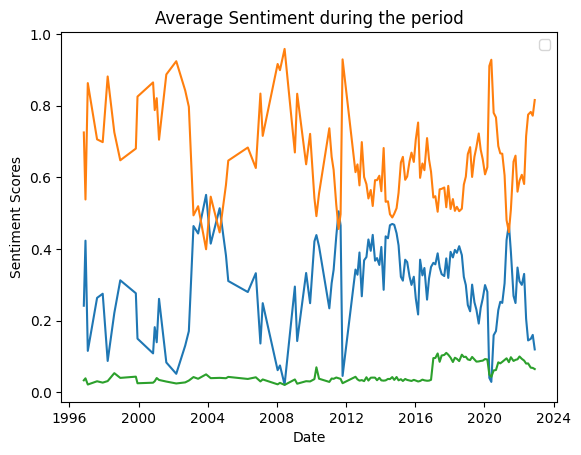

In [26]:
df= pd.read_csv('Beigebook_cleaned.csv')
df['Date'] = pd.to_datetime(df['Date'])
sent = df.iloc[:,1:9]

date=sent.groupby('Date')[['Positive','Negative','Neutral']].mean()
print(date.mean())

plt.plot(date.index,date.values)
plt.title('Average Sentiment during the period')
plt.xlabel('Date')
plt.ylabel('Sentiment Scores')
plt.legend()
plt.show()





In [27]:
sent.groupby(['Date', 'Sector'])[['Positive','Negative','Neutral']].mean()



Positive  Negative   Neutral
Date       Sector                                                         
1996-10-30 Agriculture and Natural Resources  0.245568  0.698738  0.055694
           Banking and Financial Services     0.310161  0.652801  0.037039
           Consumer Spending and Tourism      0.236019  0.738522  0.025458
           Energy                             0.471979  0.493784  0.034237
           Manufacturing and Transportation   0.228691  0.742884  0.028426
...                                                ...       ...       ...
2022-11-30 Overall                            0.100539  0.788238  0.111223
           Prices and Labor Markets           0.127950  0.812683  0.059367
           Real Estate and Construction       0.013726  0.959322  0.026952
           Retail                             0.341448  0.576997  0.081554
           Selected Business Services         0.106154  0.803313  0.090533

[1230 rows x 3 columns]

In [19]:
sentiment.groupby(['Date','Sector'])[['Positive','Negative','Neutral']].mean()

Positive  Negative   Neutral
Date       Sector                                                         
1996-10-30 Agriculture and Natural Resources  0.245568  0.698738  0.055694
           Banking and Financial Services     0.310161  0.652801  0.037039
           Consumer Spending and Tourism      0.236019  0.738522  0.025458
           Energy                             0.471979  0.493784  0.034237
           Manufacturing and Transportation   0.228691  0.742884  0.028426
...                                                ...       ...       ...
2022-11-30 Overall                            0.100539  0.788238  0.111223
           Prices and Labor Markets           0.127950  0.812683  0.059367
           Real Estate and Construction       0.013726  0.959322  0.026952
           Retail                             0.341448  0.576997  0.081554
           Selected Business Services         0.106154  0.803313  0.090533

[1230 rows x 3 columns]

In [28]:
sent.groupby(['Date', 'Region'])[['Positive','Negative','Neutral']].mean()

Positive  Negative   Neutral
Date       Region                                      
1996-10-30 Atlanta         0.250849  0.697908  0.051243
           Boston          0.217300  0.747866  0.034834
           Chicago         0.150072  0.827217  0.022711
           Cleveland       0.133510  0.833693  0.032797
           Dallas          0.172644  0.796550  0.030806
...                             ...       ...       ...
2022-11-30 Overall         0.143498  0.698406  0.158096
           Philadelphia    0.128602  0.818086  0.053312
           Richmond        0.103524  0.856761  0.039715
           San Fransicsco  0.154138  0.800557  0.045305
           St Louis        0.147083  0.803823  0.049093

[1544 rows x 3 columns]

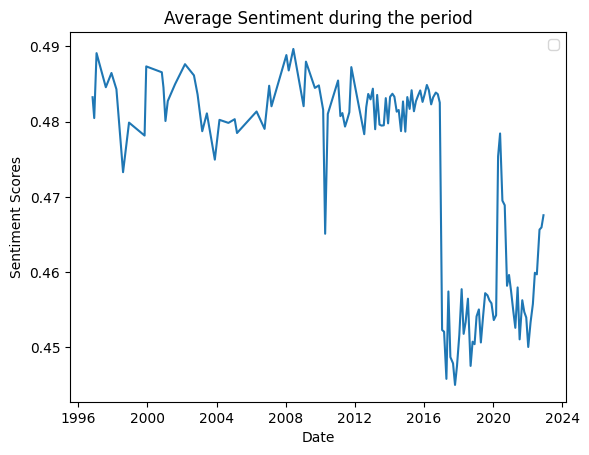

In [41]:
sent_index=df.groupby(['Date'])[['Sentiment_Index']].mean()
plt.plot(sent_index.index,sent_index.values)

plt.title('Average Sentiment during the period')
plt.xlabel('Date')
plt.ylabel('Sentiment Scores')
plt.legend()
plt.show()


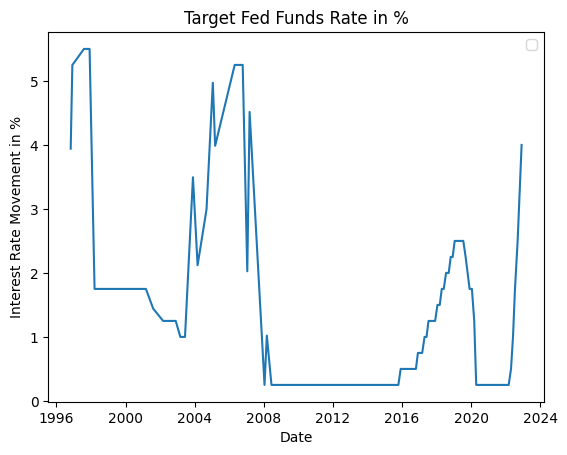

In [43]:
target= df.groupby(['Date'])['Target Rate'].mean()
plt.plot(target.index,target.values)
plt.title('Target Fed Funds Rate in %')
plt.xlabel('Date')
plt.ylabel('Interest Rate Movement in %')
plt.legend()
plt.show()

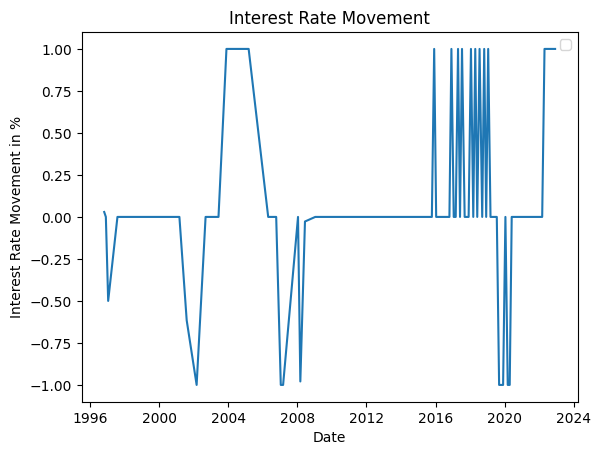

In [40]:
move= df.groupby(['Date'])['Movement'].mean()
plt.plot(move.index,move.values)
plt.title('Interest Rate Movement')
plt.xlabel('Date')
plt.ylabel('Interest Rate Movement in %')
plt.legend()
plt.show()

In [65]:
grouped=df.groupby(['Date','Sector'])['Sentiment_Index'].mean()
pivoted = grouped.unstack()

Text(0.5, 1.0, 'Sentiment Index by Sector over Time')

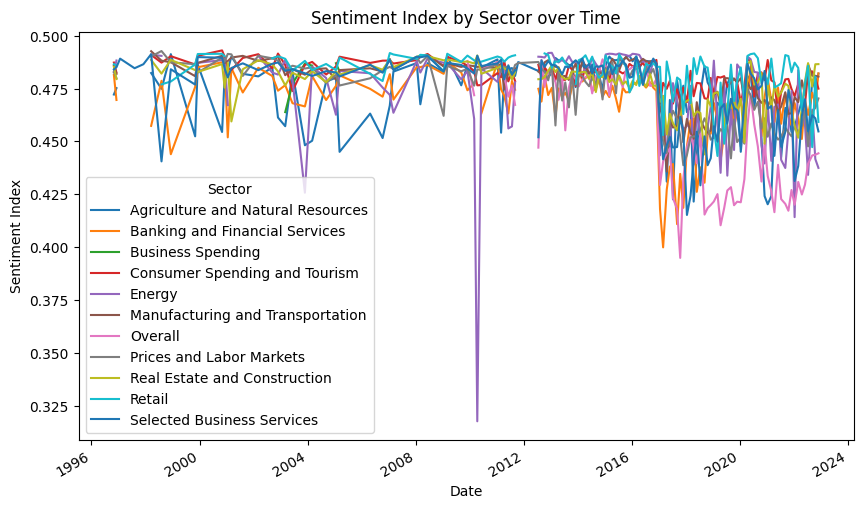

In [66]:
pivoted.plot(kind='line', figsize=(10, 6))

# Add axis labels and a title
plt.xlabel('Date')
plt.ylabel('Sentiment Index')
plt.title('Sentiment Index by Sector over Time')

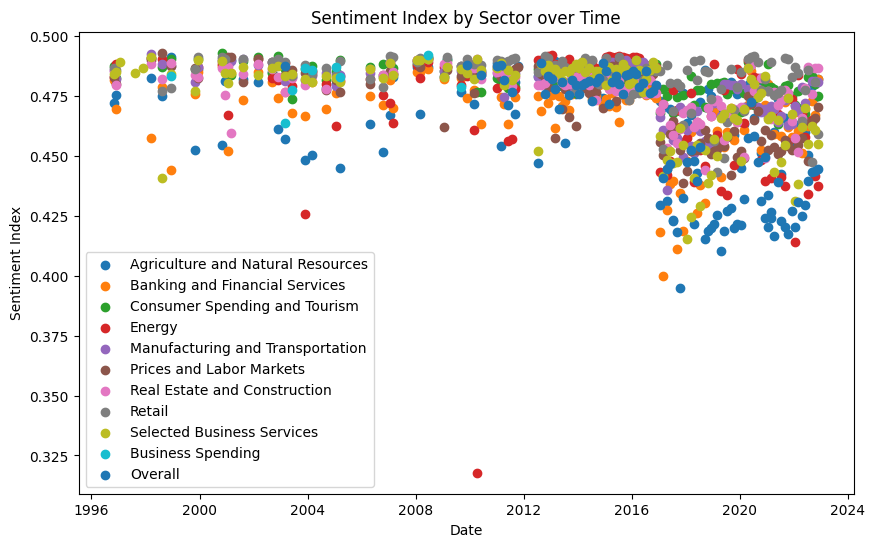

In [60]:
# Represented as a scatter plot

grouped2 = df.groupby(['Date', 'Sector'])['Sentiment_Index'].mean()

# Reset the index to create a DataFrame with columns 'Date', 'Sector', and 'Sentiment_Index'
df_grouped = grouped2.reset_index()

# Create a scatter plot with the date on the x-axis and the sentiment index of each sector on the y-axis
fig, ax = plt.subplots(figsize=(10, 6))
for sector in df_grouped['Sector'].unique():
    data = df_grouped[df_grouped['Sector'] == sector]
    ax.scatter(data['Date'], data['Sentiment_Index'], label=sector)

# Add axis labels and a title
plt.xlabel('Date')
plt.ylabel('Sentiment Index')
plt.title('Sentiment Index by Sector over Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

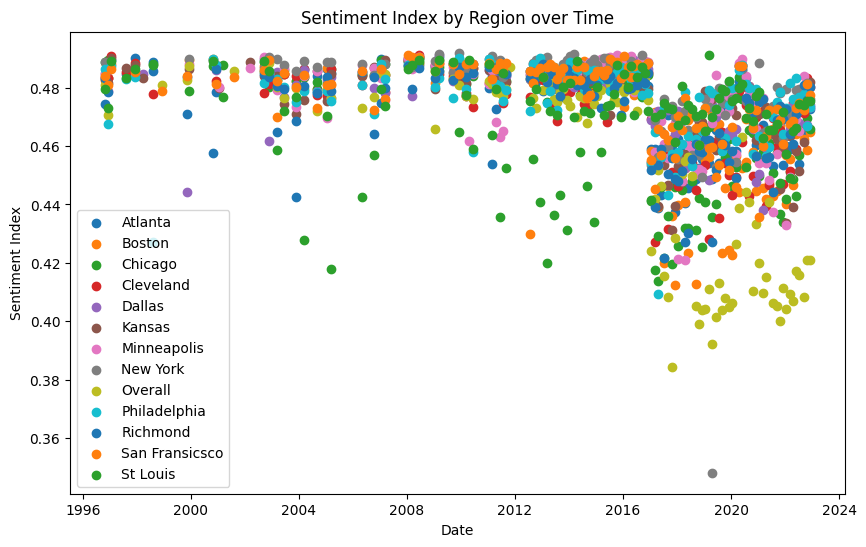

In [61]:
# Represented as a scatter plot

grouped2 = df.groupby(['Date', 'Region'])['Sentiment_Index'].mean()

# Reset the index to create a DataFrame with columns 'Date', 'Sector', and 'Sentiment_Index'
df_grouped = grouped2.reset_index()

# Create a scatter plot with the date on the x-axis and the sentiment index of each sector on the y-axis
fig, ax = plt.subplots(figsize=(10, 6))
for sector in df_grouped['Region'].unique():
    data = df_grouped[df_grouped['Region'] == sector]
    ax.scatter(data['Date'], data['Sentiment_Index'], label=sector)

# Add axis labels and a title
plt.xlabel('Date')
plt.ylabel('Sentiment Index')
plt.title('Sentiment Index by Region over Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

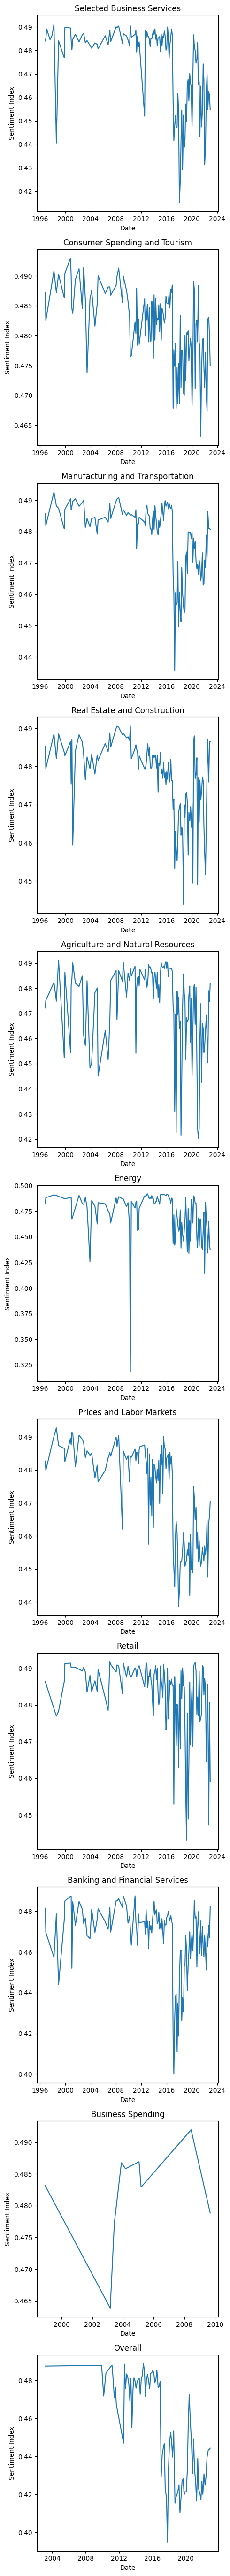

In [79]:
unique_sectors = df['Sector'].unique()

# Create subplots
fig, axs = plt.subplots(len(unique_sectors), 1, figsize=(5, 5*len(unique_sectors)))

# Loop through sectors and plot line chart
for i, sector in enumerate(unique_sectors):
    sector_data = grouped.loc[:, sector]
    axs[i].plot(sector_data.index.get_level_values('Date'), sector_data.values)
    axs[i].set_title(sector)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Sentiment Index')

# Adjust layout and display plot
plt.tight_layout()
plt.show()

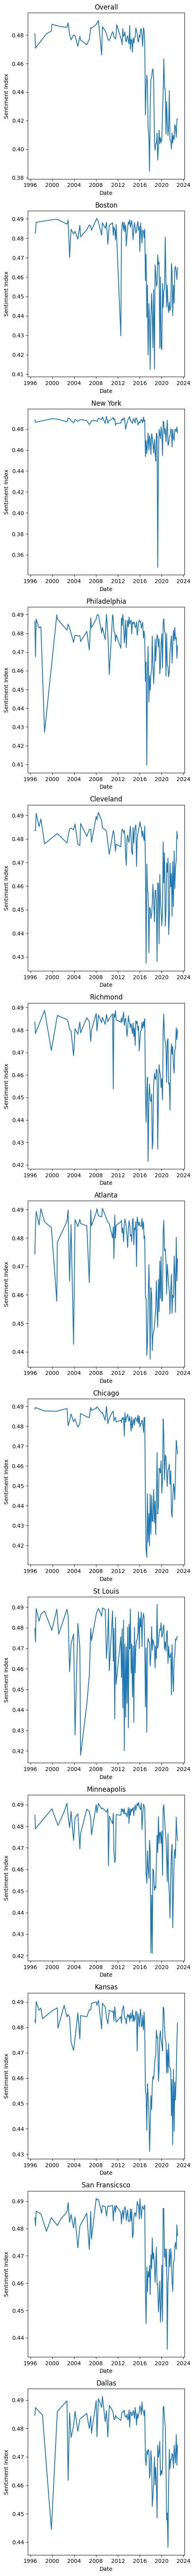

In [82]:
unique_region = df['Region'].unique()

# Create subplots
fig, axs = plt.subplots(len(unique_region), 1, figsize=(5, 5*len(unique_region)))

# Loop through sectors and plot line chart
for i, region in enumerate(unique_region):
    region_data = grouped2.loc[:, region]
    axs[i].plot(region_data.index.get_level_values('Date'), region_data.values)
    axs[i].set_title(region)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Sentiment Index')

# Adjust layout and display plot
plt.tight_layout()
plt.show()
